In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

### I converted the GlobalLandTemperaturesByCity dataset into a dataframe

In [3]:
dtee = pd.read_csv(r"GlobalLandTemperaturesByCity.csv")
dtee.head(6)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E


In [4]:
dtee.shape

(8599212, 7)

### I dropped the columns I won't use

In [5]:
dte = dtee.drop(columns=['AverageTemperatureUncertainty', 'City', 'Latitude', 'Longitude'])
dte

,dt,AverageTemperature,Country
0,1743-11-01,6.068,Denmark
1,1743-12-01,NaN,Denmark
2,1744-01-01,NaN,Denmark
3,1744-02-01,NaN,Denmark
4,1744-03-01,NaN,Denmark
...,...,...,...
8599207,2013-05-01,11.464,Netherlands
8599208,2013-06-01,15.043,Netherlands
8599209,2013-07-01,18.775,Netherlands
8599210,2013-08-01,18.025,Netherlands


### I dropped nan values

In [6]:
dte = dte.dropna()
dte

,dt,AverageTemperature,Country
0,1743-11-01,6.068,Denmark
5,1744-04-01,5.788,Denmark
6,1744-05-01,10.644,Denmark
7,1744-06-01,14.051,Denmark
8,1744-07-01,16.082,Denmark
...,...,...,...
8599206,2013-04-01,7.710,Netherlands
8599207,2013-05-01,11.464,Netherlands
8599208,2013-06-01,15.043,Netherlands
8599209,2013-07-01,18.775,Netherlands


### Graph showing the temperature change over the years by converting the exact dates in the dataframe to years

C:\Users\90539\AppData\Local\Temp\ipykernel_23524\2463799025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dte['dt'] = pd.to_datetime(dte.dt).dt.strftime('%d/%m/%Y')
C:\Users\90539\AppData\Local\Temp\ipykernel_23524\2463799025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dte['dt'] = dte['dt'].apply(lambda x:x[6:])


<AxesSubplot:title={'center':'Average Global Temperature Movement'}, xlabel='Date (1750 - 2015)', ylabel='Average Global Temperature'>

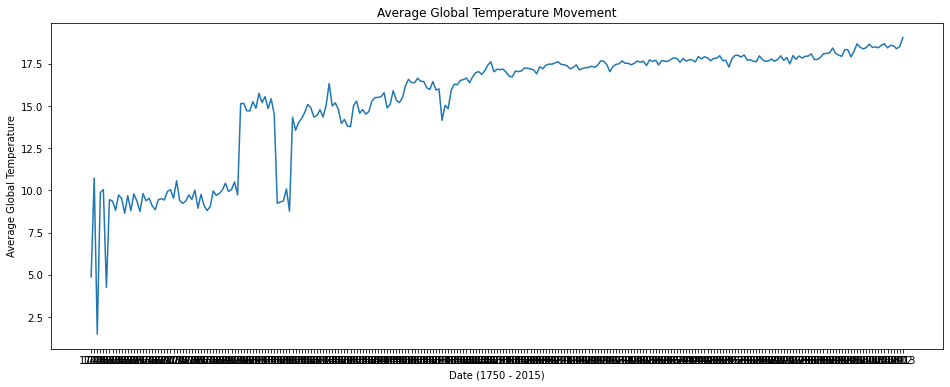

In [7]:
dte['dt'] = pd.to_datetime(dte.dt).dt.strftime('%d/%m/%Y')
dte['dt'] = dte['dt'].apply(lambda x:x[6:])
dte = dte.groupby(['dt'])['AverageTemperature'].mean().reset_index()

plt.figure(figsize =(16, 6))
ax = sns.lineplot(
    x = dte['dt'],
    y = dte['AverageTemperature'])
ax.set_title('Average Global Temperature Movement')
ax.set_ylabel('Average Global Temperature')
ax.set_xlabel('Date (1750 - 2015)')
#ax.axes.get_xaxis().set_ticks([])
ax

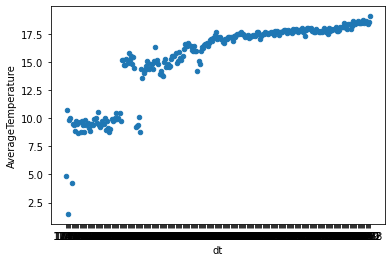

In [8]:
dte.plot.scatter(x='dt', y='AverageTemperature', title='');


### I created a linear regression model and performed the machine learning steps

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()


In [10]:
X = dte.iloc[:, dte.columns != 'AverageTemperature'].values
y = dte.iloc[:, dte.columns == 'AverageTemperature'].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

In [12]:
#X_train

In [13]:
#y_train

In [14]:
regressor.fit(X_train, y_train)

LinearRegression()

### I created predictions of X_test data according to the model

In [15]:
y_pred = regressor.predict(X_test)
y_pred

array([[18.54970825],
       [13.31295845],
       [19.49468566],
       [11.02926305],
       [18.03784549],
       [17.68347896],
       [10.1236597 ],
       [14.61230239],
       [14.10043963],
       [14.53355427],
       [12.13173669],
       [19.65218189],
       [13.47045469],
       [10.55677435],
       [10.28115594],
       [ 9.88741535],
       [12.36798105],
       [16.34476097],
       [20.32154089],
       [16.73850155],
       [14.33668398],
       [19.96717436],
       [15.99039444],
       [12.72234757],
       [15.47853168],
       [19.02219695],
       [19.80967813],
       [13.27358439],
       [15.04541703],
       [13.15546222],
       [12.87984381],
       [14.29730992],
       [12.24985887],
       [20.24279277],
       [14.84854674],
       [16.22663879],
       [16.93537185],
       [19.61280783],
       [17.6441049 ],
       [18.74657854],
       [16.58100532],
       [17.28973837],
       [17.80160114],
       [19.17969319],
       [17.36848649],
       [15

In [16]:
X_train = X_train.astype('float64')
y_train = y_train.astype('float64')
X_test = X_test.astype('float64')
y_test = y_test.astype('float64')

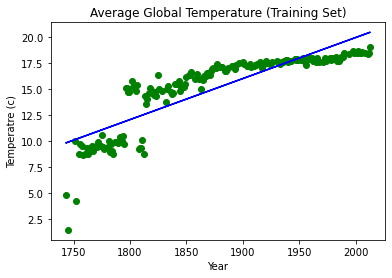

In [17]:
x_pred = regressor.predict(X_train)

# Visualising the training set results
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, x_pred, color = 'blue')
plt.title('Average Global Temperature (Training Set)')
plt.xlabel('Year')
plt.ylabel('Temperatre (c)')
plt.show()

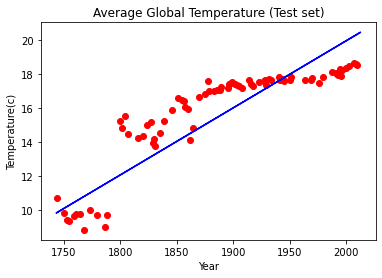

In [18]:
# Visualising the test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Average Global Temperature (Test set)')
plt.xlabel('Year')
plt.ylabel('Temperature(c)')
plt.show()

In [19]:
# Building the predictor
X_predict = [2050] # Enter the year that you require the temperature for make predict
X_predict = np.array(X_predict).reshape(1, -1)
y_predict = regressor.predict(X_predict)

# Outputting the predicted temperature of the year above
y_predict

array([[21.93587729]])

In [20]:
X_predict

array([[2050]])

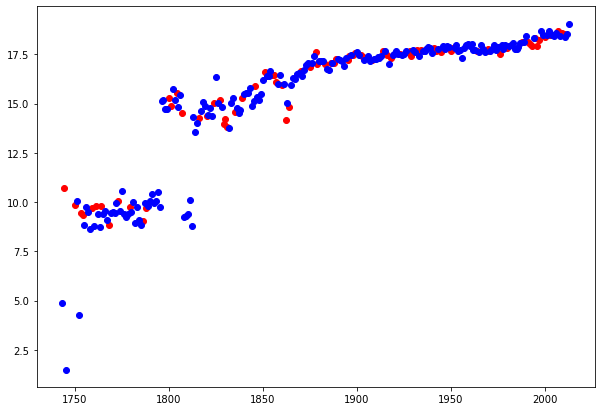

In [21]:
plt.figure(figsize=(10, 7))
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_train, y_train, color = 'blue')
#plt.scatter(X_train, regressor.predict(X_train), color = 'red')
plt.legend
plt.show()